In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import seaborn as sns


In [66]:
df=pd.read_csv("economy.csv",skipinitialspace=True)
df.head()

,date,airline,ch_code,num_code,dep_time,from,duration,stop,arr_time,destination,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [67]:
df.shape

(206774, 11)

In [68]:
df.describe()

,num_code
count,206774.000000
mean,1706.096714
std,2320.463721
min,101.000000
25%,588.000000
50%,818.000000
75%,960.000000
max,9991.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         206774 non-null  object
 1   airline      206774 non-null  object
 2   ch_code      206774 non-null  object
 3   num_code     206774 non-null  int64 
 4   dep_time     206774 non-null  object
 5   from         206774 non-null  object
 6   duration     206774 non-null  object
 7   stop         206774 non-null  object
 8   arr_time     206774 non-null  object
 9   destination  206774 non-null  object
 10  price        206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [70]:
# start handling features one by one
# handle date using feature engineering
df['Date']=df['date'].str.split('-').str[0]
df['Month']=df['date'].str.split('-').str[1]
df['Year']=df['date'].str.split('-').str[2]
df.head()

,date,airline,ch_code,num_code,dep_time,from,duration,stop,arr_time,destination,price,Date,Month,Year
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,02,2022
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,02,2022
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,02,2022
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,02,2022
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,02,2022


In [71]:
# now convert data , month and year into int as they are present as objects in data
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         206774 non-null  object
 1   airline      206774 non-null  object
 2   ch_code      206774 non-null  object
 3   num_code     206774 non-null  int64 
 4   dep_time     206774 non-null  object
 5   from         206774 non-null  object
 6   duration     206774 non-null  object
 7   stop         206774 non-null  object
 8   arr_time     206774 non-null  object
 9   destination  206774 non-null  object
 10  price        206774 non-null  object
 11  Date         206774 non-null  int64 
 12  Month        206774 non-null  int64 
 13  Year         206774 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 22.1+ MB


In [73]:
df.drop('date',axis=1,inplace=True)
df.head()

,airline,ch_code,num_code,dep_time,from,duration,stop,arr_time,destination,price,Date,Month,Year
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,2,2022
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,2,2022
2,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,2,2022
3,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,2,2022
4,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,2,2022


In [74]:
#handle arrival time
df['arr_hour']=df['arr_time'].str.split(':').str[0]
df['arr_min']=df['arr_time'].str.split(':').str[1]
df.head()

,airline,ch_code,num_code,dep_time,from,duration,stop,arr_time,destination,price,Date,Month,Year,arr_hour,arr_min
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,2,2022,21,05
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,2,2022,08,40
2,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,2,2022,06,35
3,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,2,2022,12,35
4,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,2,2022,11,10


In [75]:
df.drop('arr_time',axis=1,inplace=True)
df.head()

,airline,ch_code,num_code,dep_time,from,duration,stop,destination,price,Date,Month,Year,arr_hour,arr_min
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,Mumbai,"5,953",11,2,2022,21,05
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,Mumbai,"5,953",11,2,2022,08,40
2,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,Mumbai,"5,956",11,2,2022,06,35
3,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,Mumbai,"5,955",11,2,2022,12,35
4,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,Mumbai,"5,955",11,2,2022,11,10


In [76]:
df['arr_hour']=df['arr_hour'].astype(int)
df['arr_min']=df['arr_min'].astype(int)

In [77]:
# handle departure time
df['dep_hour']=df['dep_time'].str.split(':').str[0]
df['dep_min']=df['dep_time'].str.split(':').str[1]
df.head()

,airline,ch_code,num_code,dep_time,from,duration,stop,destination,price,Date,Month,Year,arr_hour,arr_min,dep_hour,dep_min
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,Mumbai,"5,953",11,2,2022,21,5,18,55
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,Mumbai,"5,953",11,2,2022,8,40,06,20
2,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,Mumbai,"5,956",11,2,2022,6,35,04,25
3,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,Mumbai,"5,955",11,2,2022,12,35,10,20
4,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,Mumbai,"5,955",11,2,2022,11,10,08,50


In [78]:
df.drop('dep_time',axis=1,inplace=True)
df.head()

,airline,ch_code,num_code,from,duration,stop,destination,price,Date,Month,Year,arr_hour,arr_min,dep_hour,dep_min
0,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,"5,953",11,2,2022,21,5,18,55
1,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,"5,953",11,2,2022,8,40,06,20
2,AirAsia,I5,764,Delhi,02h 10m,non-stop,Mumbai,"5,956",11,2,2022,6,35,04,25
3,Vistara,UK,995,Delhi,02h 15m,non-stop,Mumbai,"5,955",11,2,2022,12,35,10,20
4,Vistara,UK,963,Delhi,02h 20m,non-stop,Mumbai,"5,955",11,2,2022,11,10,08,50


In [79]:
df['dep_hour']=df['dep_hour'].astype(int)
df['dep_min']=df['dep_min'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   airline      206774 non-null  object
 1   ch_code      206774 non-null  object
 2   num_code     206774 non-null  int64 
 3   from         206774 non-null  object
 4   duration     206774 non-null  object
 5   stop         206774 non-null  object
 6   destination  206774 non-null  object
 7   price        206774 non-null  object
 8   Date         206774 non-null  int64 
 9   Month        206774 non-null  int64 
 10  Year         206774 non-null  int64 
 11  arr_hour     206774 non-null  int64 
 12  arr_min      206774 non-null  int64 
 13  dep_hour     206774 non-null  int64 
 14  dep_min      206774 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 23.7+ MB


In [80]:
# map stop variable 
df['stop']=df['stop'].str.replace(r'\s+',' ',regex=True)
df['stop'].unique()

array(['non-stop ', '1-stop', '1-stop Via IXU', '1-stop ',
       '1-stop Via Chennai ', '1-stop Via Indore ', '1-stop Via IXU ',
       '1-stop Via RPR ', '2-stop', '1-stop Via Lucknow ',
       '1-stop Via GOP ', '2+-stop', '1-stop Via Raipur ',
       '1-stop Via Nagpur ', '1-stop Via Surat ', '1-stop Via Hyderabad ',
       '1-stop Via STV ', '1-stop Via IDR ', '1-stop Via VTZ ',
       '1-stop Via Guwahati ', '1-stop Via NAG ',
       '1-stop Via Vishakhapatnam ', '1-stop Via NDC ', '1-stop Via IXE ',
       '1-stop Via Patna ', '1-stop Via PAT ', '1-stop Via Mangalore ',
       '1-stop Via Mumbai ', '1-stop Via KLH ', '1-stop Via MYQ ',
       '1-stop Via Kolkata ', '1-stop Via Delhi ', '1-stop Via Kolhapur ',
       '1-stop Via JRG ', '1-stop Via Bhubaneswar ', '1-stop Via Ranchi ',
       '1-stop Via IXR ', '1-stop Via JGB ', '1-stop Via BBI ',
       '1-stop Via Mysore '], dtype=object)

In [81]:
# there exists a lot of wide spaces in csv file. handle them and start mapping
df['stop'] = df['stop'].str.strip().str.lower()
df['stop'] = df['stop'].str.replace(r'\s+', ' ', regex=True)


In [82]:
mapping_dict = {
    'non-stop': 1,
    '1-stop': 2,
    '1-stop via ixu': 2,
    '1-stop via chennai': 2,
    '1-stop via indore': 3,
    '1-stop via rpr': 2,
    '2-stop': 3,
    '1-stop via lucknow': 3,
    '1-stop via gop': 2,
    '1-stop via raipur': 2,
    '1-stop via nagpur': 2,
    '1-stop via surat': 3,
    '1-stop via hyderabad': 2,
    '1-stop via stv': 3,
    '1-stop via idr': 3,
    '1-stop via vtz': 2,
    '1-stop via guwahati': 3,
    '1-stop via nag': 2,
    '1-stop via vishakhapatnam': 2,
    '1-stop via ndc': 2,
    '1-stop via ixe': 2,
    '1-stop via patna': 3,
    '1-stop via pat': 2,
    '1-stop via mangalore': 2,
    '1-stop via mumbai': 3,
    '1-stop via klh': 3,
    '1-stop via myq': 2,
    '1-stop via kolkata': 2,
    '1-stop via delhi': 2,
    '1-stop via kolhapur': 3,
    '1-stop via jrg': 3,
    '1-stop via bhubaneswar': 3,
    '1-stop via ranchi': 3,
    '1-stop via ixr': 3,
    '1-stop via jgb': 3,
    '1-stop via bbi': 3,
    '1-stop via mysore': 3,
    '2+-stop':3
}


In [83]:
df['stop_mapped'] = df['stop'].map(mapping_dict)


In [84]:
df.head()

,airline,ch_code,num_code,from,duration,stop,destination,price,Date,Month,Year,arr_hour,arr_min,dep_hour,dep_min,stop_mapped
0,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,"5,953",11,2,2022,21,5,18,55,1
1,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,"5,953",11,2,2022,8,40,6,20,1
2,AirAsia,I5,764,Delhi,02h 10m,non-stop,Mumbai,"5,956",11,2,2022,6,35,4,25,1
3,Vistara,UK,995,Delhi,02h 15m,non-stop,Mumbai,"5,955",11,2,2022,12,35,10,20,1
4,Vistara,UK,963,Delhi,02h 20m,non-stop,Mumbai,"5,955",11,2,2022,11,10,8,50,1


In [85]:
df[df['stop_mapped'].isnull()]['stop'].unique()


array([], dtype=object)

In [86]:
df.drop('stop',axis=1,inplace=True)

In [87]:
df.head()

,airline,ch_code,num_code,from,duration,destination,price,Date,Month,Year,arr_hour,arr_min,dep_hour,dep_min,stop_mapped
0,SpiceJet,SG,8709,Delhi,02h 10m,Mumbai,"5,953",11,2,2022,21,5,18,55,1
1,SpiceJet,SG,8157,Delhi,02h 20m,Mumbai,"5,953",11,2,2022,8,40,6,20,1
2,AirAsia,I5,764,Delhi,02h 10m,Mumbai,"5,956",11,2,2022,6,35,4,25,1
3,Vistara,UK,995,Delhi,02h 15m,Mumbai,"5,955",11,2,2022,12,35,10,20,1
4,Vistara,UK,963,Delhi,02h 20m,Mumbai,"5,955",11,2,2022,11,10,8,50,1


In [88]:
# handle duration of flight. 
df['duration_hours']=df['duration'].str.split(' ').str[0].str.split('h').str[0]
df['duration_min']=df['duration'].str.split(' ').str[1].str.split('h').str[0]

In [89]:
df.head()

,airline,ch_code,num_code,from,duration,destination,price,Date,Month,Year,arr_hour,arr_min,dep_hour,dep_min,stop_mapped,duration_hours,duration_min
0,SpiceJet,SG,8709,Delhi,02h 10m,Mumbai,"5,953",11,2,2022,21,5,18,55,1,02,10m
1,SpiceJet,SG,8157,Delhi,02h 20m,Mumbai,"5,953",11,2,2022,8,40,6,20,1,02,20m
2,AirAsia,I5,764,Delhi,02h 10m,Mumbai,"5,956",11,2,2022,6,35,4,25,1,02,10m
3,Vistara,UK,995,Delhi,02h 15m,Mumbai,"5,955",11,2,2022,12,35,10,20,1,02,15m
4,Vistara,UK,963,Delhi,02h 20m,Mumbai,"5,955",11,2,2022,11,10,8,50,1,02,20m


In [91]:
df.drop('duration',axis=1,inplace=True)


In [97]:
# start handling categorical features one by one . start with variable airline
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [98]:
# do one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [99]:
encoder.fit_transform(df[['airline']]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(206774, 8))

In [100]:
# extract all distinct features in variable airline
encoder.get_feature_names_out(['airline'])


array(['airline_Air India', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara'], dtype=object)

In [101]:
encoded_df= pd.DataFrame(encoder.fit_transform(df[['airline']]).toarray(),columns=encoder.get_feature_names_out(['airline']))

In [102]:
df=pd.concat([df.reset_index(drop=True),encoded_df.reset_index(drop=True)],axis=1)

In [103]:
df.head()

,airline,ch_code,num_code,from,destination,price,Date,Month,Year,arr_hour,...,duration_hours,duration_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara
0,SpiceJet,SG,8709,Delhi,Mumbai,"5,953",11,2,2022,21,...,02,10m,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,SpiceJet,SG,8157,Delhi,Mumbai,"5,953",11,2,2022,8,...,02,20m,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,AirAsia,I5,764,Delhi,Mumbai,"5,956",11,2,2022,6,...,02,10m,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Vistara,UK,995,Delhi,Mumbai,"5,955",11,2,2022,12,...,02,15m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Vistara,UK,963,Delhi,Mumbai,"5,955",11,2,2022,11,...,02,20m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [104]:
df.drop('airline',axis=1,inplace=True)

In [105]:
# similarly do one hot encoding pn variable -from
encoder.fit_transform(df[['from']]).toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], shape=(206774, 6))

In [106]:
encoder.get_feature_names_out(['from'])

array(['from_Bangalore', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai'], dtype=object)

In [107]:
encoded_df=pd.DataFrame(encoder.fit_transform(df[['from']]).toarray(),columns=encoder.get_feature_names_out(['from']))

In [108]:
df=pd.concat([df.reset_index(drop=True),encoded_df.reset_index(drop=True)],axis=1)

In [109]:
df.head()

,ch_code,num_code,from,destination,price,Date,Month,Year,arr_hour,arr_min,...,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,SG,8709,Delhi,Mumbai,"5,953",11,2,2022,21,5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,SG,8157,Delhi,Mumbai,"5,953",11,2,2022,8,40,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,I5,764,Delhi,Mumbai,"5,956",11,2,2022,6,35,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,UK,995,Delhi,Mumbai,"5,955",11,2,2022,12,35,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,UK,963,Delhi,Mumbai,"5,955",11,2,2022,11,10,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [110]:
df.drop('from',axis=1,inplace=True)

In [111]:
# do one hot encoding on variable - destination
encoder.fit_transform(df[['destination']]).toarray()

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], shape=(206774, 6))

In [112]:
encoder.get_feature_names_out(['destination'])

array(['destination_Bangalore', 'destination_Chennai',
       'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'destination_Mumbai'], dtype=object)

In [113]:
encoded_df=pd.DataFrame(encoder.fit_transform(df[['destination']]).toarray(),columns=encoder.get_feature_names_out(['destination']))

In [58]:
df=pd.concat([df.reset_index(drop=True),encoded_df.reset_index(drop=True)],axis=1)

In [114]:
df.head()

,ch_code,num_code,destination,price,Date,Month,Year,arr_hour,arr_min,dep_hour,...,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,SG,8709,Mumbai,"5,953",11,2,2022,21,5,18,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,SG,8157,Mumbai,"5,953",11,2,2022,8,40,6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,I5,764,Mumbai,"5,956",11,2,2022,6,35,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,UK,995,Mumbai,"5,955",11,2,2022,12,35,10,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,UK,963,Mumbai,"5,955",11,2,2022,11,10,8,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [115]:
df.drop('destination',axis=1,inplace=True)

In [116]:
df.head()

,ch_code,num_code,price,Date,Month,Year,arr_hour,arr_min,dep_hour,dep_min,...,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,SG,8709,"5,953",11,2,2022,21,5,18,55,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,SG,8157,"5,953",11,2,2022,8,40,6,20,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,I5,764,"5,956",11,2,2022,6,35,4,25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,UK,995,"5,955",11,2,2022,12,35,10,20,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,UK,963,"5,955",11,2,2022,11,10,8,50,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [119]:
# do one hot encoding on variable ch_code
encoded_df=pd.DataFrame(encoder.fit_transform(df[['ch_code']]).toarray(),columns=encoder.get_feature_names_out(['ch_code']))


In [121]:
df=pd.concat([df.reset_index(drop=True),encoded_df.reset_index(drop=True)],axis=1)

In [124]:
df.head()

,ch_code,num_code,price,Date,Month,Year,arr_hour,arr_min,dep_hour,dep_min,...,from_Kolkata,from_Mumbai,ch_code_2T,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,SG,8709,"5,953",11,2,2022,21,5,18,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,SG,8157,"5,953",11,2,2022,8,40,6,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,I5,764,"5,956",11,2,2022,6,35,4,25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,UK,995,"5,955",11,2,2022,12,35,10,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,UK,963,"5,955",11,2,2022,11,10,8,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
df.drop('ch_code',axis=1,inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   num_code           206774 non-null  int64  
 1   price              206774 non-null  object 
 2   Date               206774 non-null  int64  
 3   Month              206774 non-null  int64  
 4   Year               206774 non-null  int64  
 5   arr_hour           206774 non-null  int64  
 6   arr_min            206774 non-null  int64  
 7   dep_hour           206774 non-null  int64  
 8   dep_min            206774 non-null  int64  
 9   stop_mapped        206774 non-null  int64  
 10  duration_hours     206774 non-null  object 
 11  duration_min       206774 non-null  object 
 12  airline_Air India  206774 non-null  float64
 13  airline_AirAsia    206774 non-null  float64
 14  airline_GO FIRST   206774 non-null  float64
 15  airline_Indigo     206774 non-null  float64
 16  ai

In [ ]:
# convert all float datatypes into int
float_col=df.select_dtypes(include='float').columns
for col in float_col:
    df[col]=df[col].astype(int)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   num_code           206774 non-null  int64 
 1   price              206774 non-null  object
 2   Date               206774 non-null  int64 
 3   Month              206774 non-null  int64 
 4   Year               206774 non-null  int64 
 5   arr_hour           206774 non-null  int64 
 6   arr_min            206774 non-null  int64 
 7   dep_hour           206774 non-null  int64 
 8   dep_min            206774 non-null  int64 
 9   stop_mapped        206774 non-null  int64 
 10  duration_hours     206774 non-null  object
 11  duration_min       206774 non-null  object
 12  airline_Air India  206774 non-null  int64 
 13  airline_AirAsia    206774 non-null  int64 
 14  airline_GO FIRST   206774 non-null  int64 
 15  airline_Indigo     206774 non-null  int64 
 16  airline_SpiceJet   2

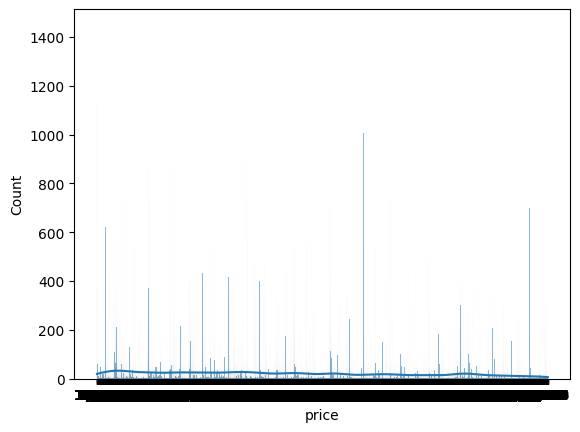

In [ ]:
# this indicates that flight prices are extremely skewed, there are lot of repeated values
sns.histplot(df['price'],kde=True)
plt.show()

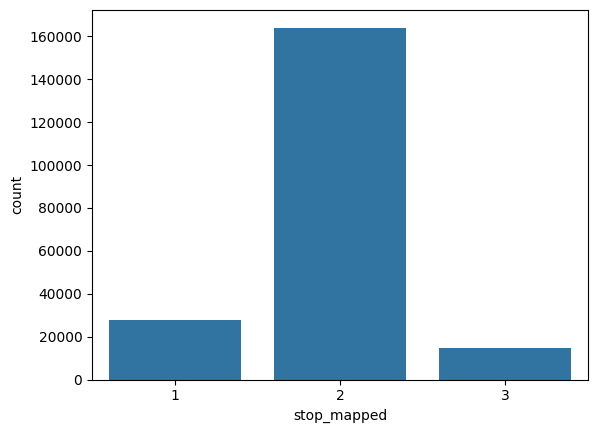

In [ ]:
# this indicates most flights are 1-stop(encoded as 2)
sns.countplot(x='stop_mapped',data=df)
plt.show()

In [147]:
print(df['Year'].unique())

[2022]


In [148]:
print(df[['Year','price']].corr())

       Year  price
Year    NaN    NaN
price   NaN    1.0


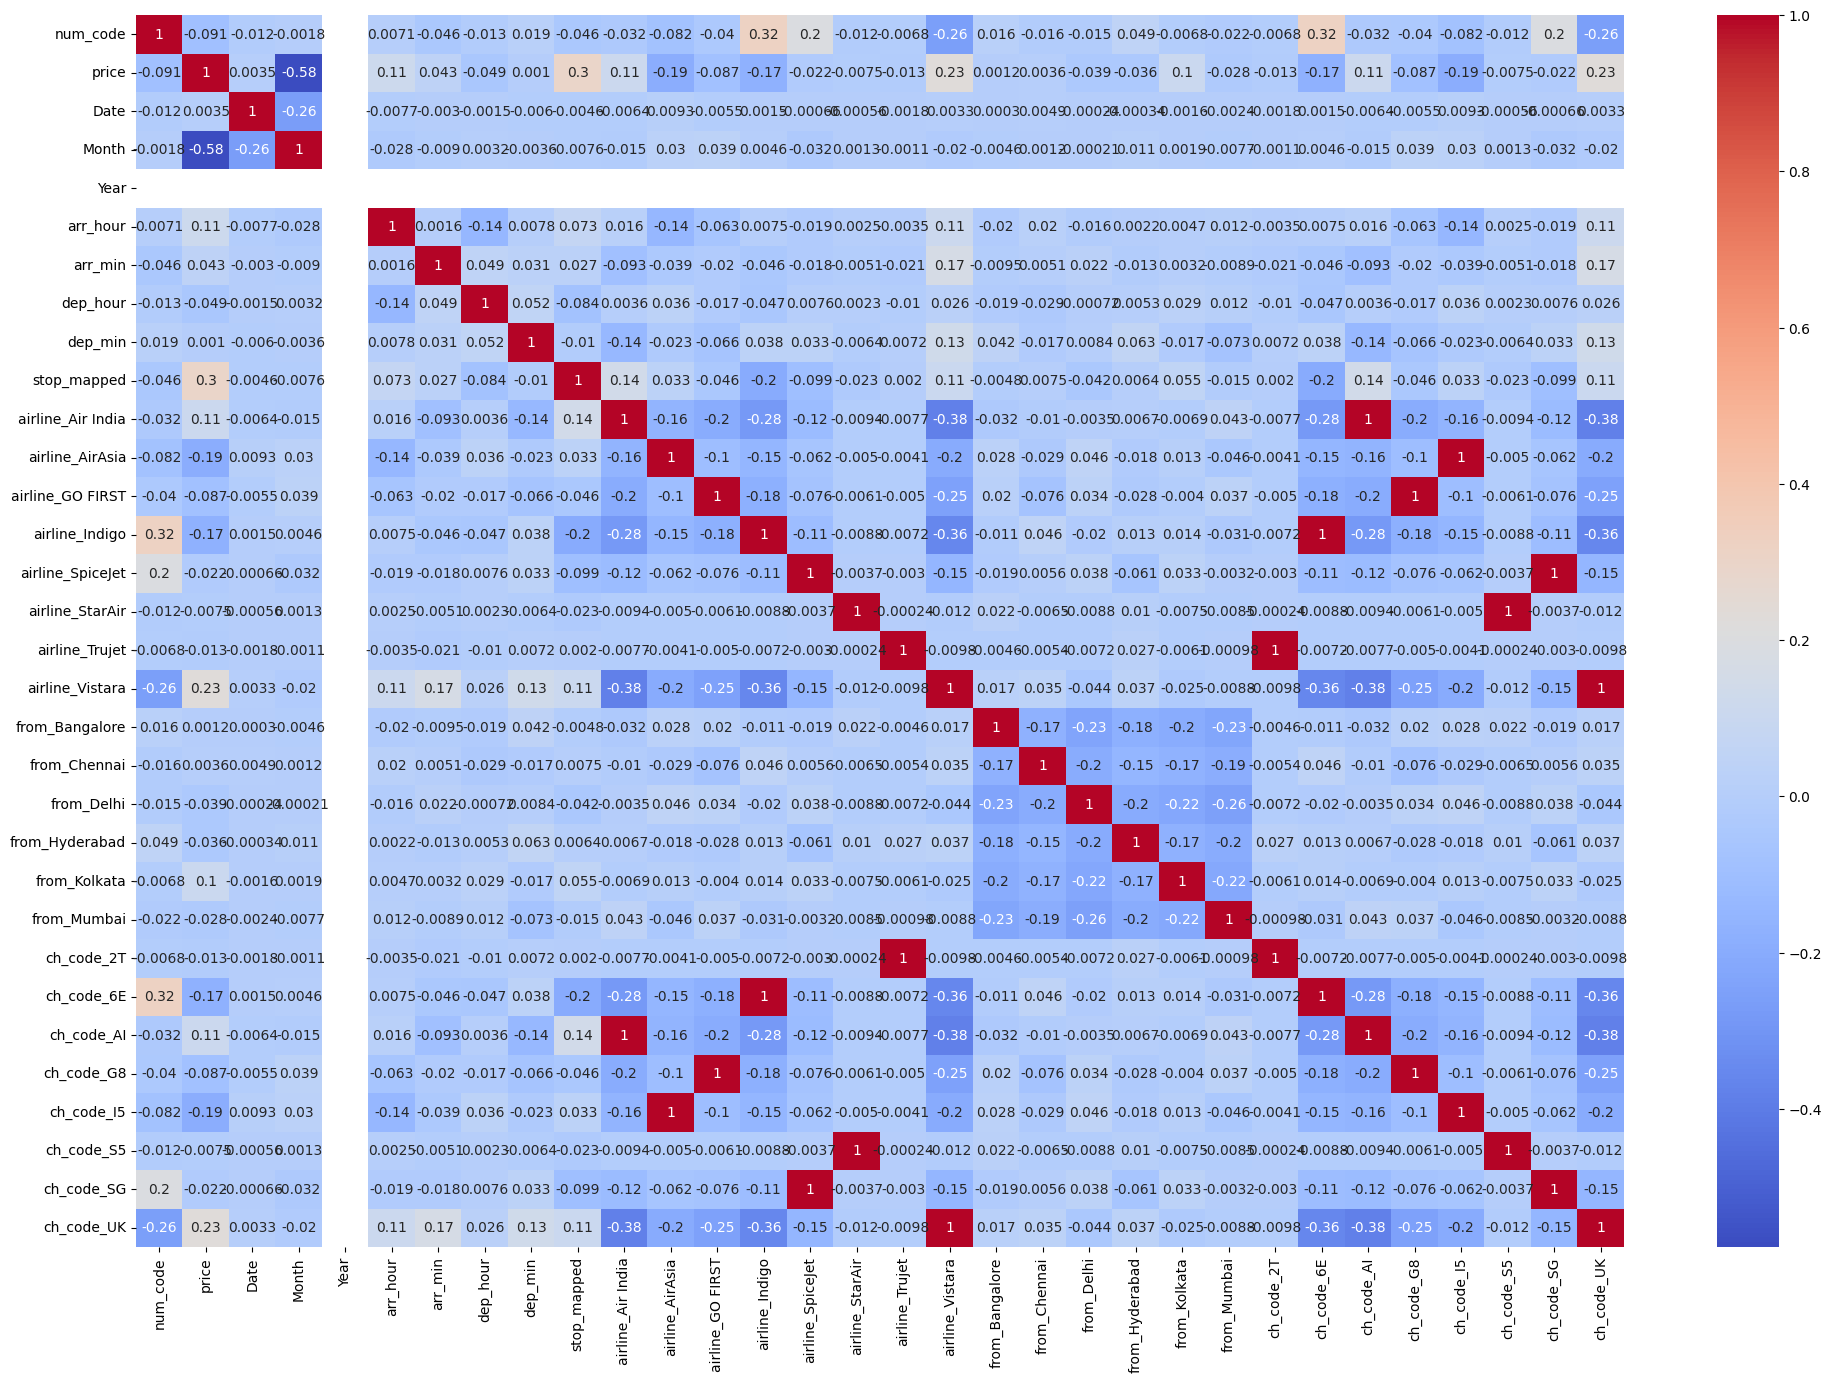

In [142]:
df['price']=df['price'].astype(str).str.replace(',' ,'').astype(float)
plt.figure(figsize=(24,16))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
# we observe in this heatmap that year column and row are entirely empty , this is because it contains the same value for all columns(2022) then its variance is 0 and correlation requires variance to compute results